In [1]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

ukdata = DataSet(r'E:\重庆师范大学\研一上\非侵入式负荷检测\program\data\ukdale_h5\ukdale.h5')
#print_dict(ukdata.metadata)
print_dict(ukdata.buildings)
print_dict(ukdata.buildings[1].metadata)


In [8]:
ukdata.buildings[1].elec

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  Ele

看一下1号居民的冰箱signature记录了什么，和冰箱具体数据（前5项）:

In [9]:
elec = ukdata.buildings[1].elec
fridge = elec['fridge']
fridge.available_columns()

df = next(fridge.load())
df.head()

physical_quantity,power
type,active
2012-12-14 22:21:32+00:00,85.0
2012-12-14 22:21:38+00:00,85.0
2012-12-14 22:21:44+00:00,84.0
2012-12-14 22:21:50+00:00,85.0
2012-12-14 22:21:56+00:00,85.0


提取功率数据（对别的电器，可能不止测量了功率，还有其他的）：

In [10]:
series = next(fridge.power_series())
series.head()


2012-12-14 22:21:32+00:00    85.0
2012-12-14 22:21:38+00:00    85.0
2012-12-14 22:21:44+00:00    84.0
2012-12-14 22:21:50+00:00    85.0
2012-12-14 22:21:56+00:00    85.0
Name: (power, active), dtype: float32

In [11]:
#采样周期为1分钟(不知道是如何采样的，应该是60s内数据的平均)
df = next(fridge.load(ac_type='active', sample_period=60))
df.head()



physical_quantity,power
type,active
2012-12-14 22:21:00+00:00,84.800003
2012-12-14 22:22:00+00:00,85.300003
2012-12-14 22:23:00+00:00,89.000000
2012-12-14 22:24:00+00:00,91.099998
2012-12-14 22:25:00+00:00,86.222221


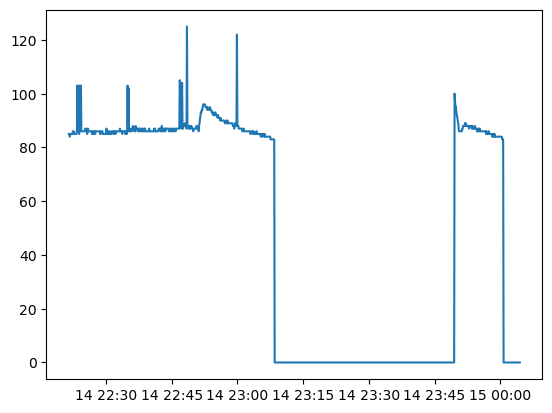

In [12]:
#绘图看看
import matplotlib.pyplot as plt
data = series[:1000]
plt.plot(data)
plt.show()